In [ ]:
!wget https://f001.backblazeb2.com/file/Backblaze-Hard-Drive-Data/data_Q1_2022.zip

--2023-04-01 10:30:35--  https://f001.backblazeb2.com/file/Backblaze-Hard-Drive-Data/data_Q1_2022.zip
Resolving f001.backblazeb2.com (f001.backblazeb2.com)... 104.153.233.181
Connecting to f001.backblazeb2.com (f001.backblazeb2.com)|104.153.233.181|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 1064968390 (1016M) [application/zip]
Saving to: ‘data_Q1_2022.zip’

data_Q1_2022.zip    100%[===================>]   1016M  17.6MB/s    in 66s     

2023-04-01 10:31:42 (15.3 MB/s) - ‘data_Q1_2022.zip’ saved [1064968390/1064968390]



In [ ]:
!unzip /content/data_Q1_2022.zip

Archive:  /content/data_Q1_2022.zip
   creating: data_Q1_2022/
  inflating: __MACOSX/._data_Q1_2022  
  inflating: data_Q1_2022/2022-03-11.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-03-11.csv  
  inflating: data_Q1_2022/2022-03-05.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-03-05.csv  
  inflating: data_Q1_2022/2022-01-14.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-01-14.csv  
  inflating: data_Q1_2022/2022-01-28.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-01-28.csv  
  inflating: data_Q1_2022/2022-01-29.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-01-29.csv  
  inflating: data_Q1_2022/2022-01-01.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-01-01.csv  
  inflating: data_Q1_2022/2022-01-15.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-01-15.csv  
  inflating: data_Q1_2022/2022-03-04.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-03-04.csv  
  inflating: data_Q1_2022/2022-03-10.csv  
  inflating: __MACOSX/data_Q1_2022/._2022-03-10.csv  
  inflating: data_Q1_2022

# Extracting Failure Data

In [ ]:
import os
import pandas as pd

# Define the directory path where the CSV files are located
dir_path = '/content/data_Q1_2022'

# Define the condition to filter the records
condition = 'failure==1'

# Create an empty dataframe to store the compiled records
df = pd.DataFrame()

# Loop through each CSV file in the directory and filter the records based on the condition
for file_name in os.listdir(dir_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(dir_path, file_name)
        temp_df = pd.read_csv(file_path)
        filtered_df = temp_df.query(condition)
        df = pd.concat([df, filtered_df], ignore_index=True)

# Print the compiled dataframe
print(df)

           date serial_number                model  capacity_bytes  failure  \
0    2022-02-03      ZLW0C6ZV        ST12000NM001G  12000138625024        1   
1    2022-02-03      ZA10B5K0          ST8000DM002   8001563222016        1   
2    2022-02-03      ZA180Q9S         ST8000NM0055   8001563222016        1   
3    2022-02-03      ZA17ZNLA         ST8000NM0055   8001563222016        1   
4    2022-02-03  61A0A077F97G  TOSHIBA MG07ACA14TA  14000519643136        1   
..          ...           ...                  ...             ...      ...   
659  2022-01-18  51S0A374FVGG  TOSHIBA MG08ACA16TE  16000900661248        1   
660  2022-01-18      ZLW18PHB        ST14000NM001G  14000519643136        1   
661  2022-01-18  10K0A085F97G  TOSHIBA MG07ACA14TA  14000519643136        1   
662  2022-01-18      ZLW18EV9        ST14000NM001G  14000519643136        1   
663  2022-01-18      ZHZ6CH4W        ST12000NM0008  12000138625024        1   

     smart_1_normalized  smart_1_raw  smart_2_norma

In [ ]:
df.to_csv('failure.csv',index = False)

In [ ]:
data=pd.read_csv("/content/failure.csv")
drop=[]
for i in data.columns:
  if "normalized" in i:
    drop.append(i)
data.drop(drop,axis=1,inplace=True)
perc=50 
min_count=int(((100-perc)/100)*data.shape[0] + 1)
fdata=data.dropna(axis=1,thresh=min_count)
fdata=fdata.dropna(axis=1,how='all')# dropping the columns with NaN values
fdata=fdata.dropna()# drops all rows with even one NaN
fdata
print(fdata)

           date serial_number         model  capacity_bytes  failure  \
1    2022-02-03      ZA10B5K0   ST8000DM002   8001563222016        1   
2    2022-02-03      ZA180Q9S  ST8000NM0055   8001563222016        1   
3    2022-02-03      ZA17ZNLA  ST8000NM0055   8001563222016        1   
5    2022-01-31      ZA1819DX  ST8000NM0055   8001563222016        1   
8    2022-01-31      Z305D6HS   ST4000DM000   4000787030016        1   
..          ...           ...           ...             ...      ...   
649  2022-03-11      ZA180XHR  ST8000NM0055   8001563222016        1   
652  2022-03-11      ZA1JXEFV  ST8000NM0055   8001563222016        1   
653  2022-03-11      ZA1814DD  ST8000NM0055   8001563222016        1   
655  2022-01-18      Z302SZGN   ST4000DM000   4000787030016        1   
658  2022-01-18      ZGS01HE4    ST500LM030    500107862016        1   

     smart_1_raw  smart_3_raw  smart_4_raw  smart_5_raw   smart_7_raw  ...  \
1    152019512.0          0.0          6.0      46208.0  

In [ ]:
fdata.isnull().sum()

date              0
serial_number     0
model             0
capacity_bytes    0
failure           0
smart_1_raw       0
smart_3_raw       0
smart_4_raw       0
smart_5_raw       0
smart_7_raw       0
smart_9_raw       0
smart_10_raw      0
smart_12_raw      0
smart_187_raw     0
smart_188_raw     0
smart_190_raw     0
smart_191_raw     0
smart_192_raw     0
smart_193_raw     0
smart_194_raw     0
smart_197_raw     0
smart_198_raw     0
smart_199_raw     0
smart_240_raw     0
smart_241_raw     0
smart_242_raw     0
dtype: int64

In [ ]:
fdata.to_csv('raw_nn_failure.csv',index = False)

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile,join

In [ ]:
filepath="/content/data_Q1_2022"
files=[f for f in listdir(filepath) if isfile(join(filepath,f))]
files=[f for f in files if "csv" in f and f.startswith("2022-03-30")]
len(files)

1

In [ ]:
def drop_columns():
  data=pd.read_csv(filepath+"/2022-01-01.csv")
  drop=[]
  for i in data.columns:
    if "normalized" in i:
      drop.append(i)
  return drop 

In [ ]:
drop_names=drop_columns()

In [ ]:
master=[]

In [ ]:
# Concating all data into one master dataframe
for file_name in files:
  data=pd.read_csv(filepath+"/"+file_name)
  data.drop(drop_names,axis=1,inplace=True)
  master.append(data.copy())
  print("{} added to master_list".format(file_name))

2022-03-30.csv added to master_list


In [ ]:
master_df = pd.concat(master)
master_df.shape

(211729, 92)

In [ ]:
del data

In [ ]:
# determine the count of each model in entire dataset
count=master_df["model"]
count=count.value_counts().to_frame()
count.columns=["count"]
count['name']=count.index
count.reset_index(drop=True)
count.shape

(69, 2)

In [ ]:
# determine the failure_count of each model in entire dataset
failure_counts=master_df[master_df["failure"]==1].groupby(["model"]).agg({'model':'count'})
failure_counts.columns=["failed_count"]
failure_counts['name']=failure_counts.index
failure_counts=failure_counts.reset_index(drop=True)
failure_counts.shape

(3, 2)

In [ ]:
# determine the no_failure_count of each model in entire dataset
no_failure_counts = master_df[master_df["failure"]==0].groupby(["model"]).agg({'model':'count'})
no_failure_counts.columns = ["no_failed_count"]
no_failure_counts['name'] = no_failure_counts.index
no_failure_counts = no_failure_counts.reset_index(drop=True)
no_failure_counts.shape

(69, 2)

In [ ]:
# combine no_failure_counts and failure_counts into one df
merged_level_1 = pd.merge(no_failure_counts, failure_counts, left_on='name', right_on='name', how="left")
merged_level_1

,no_failed_count,name,failed_count
0,174,CT250MX500SSD1,NaN
1,290,DELLBOSS VD,NaN
2,26,HGST HDS5C4040ALE630,NaN
3,1,HGST HDS724040ALE640,NaN
4,3529,HGST HMS5C4040ALE640,2.0
...,...,...,...
64,3,WDC WD60EFRX,NaN
65,40,WDC WDS250G2B0A,NaN
66,8269,WDC WUH721414ALE6L4,NaN
67,2500,WDC WUH721816ALE6L0,NaN


In [ ]:
# combine models_count and failure_counts into one df
merged_level_2 = pd.merge(count, merged_level_1, left_on='name', right_on='name', how="left")
merged_level_2 = merged_level_2.fillna(0)
merged_level_2["failed_count"] = merged_level_2["failed_count"].astype('int32')
merged_level_2 = merged_level_2.sort_values(by='failed_count', ascending=False)
merged_level_2

,count,name,no_failed_count,failed_count
0,38211,TOSHIBA MG07ACA14TA,38208,3
13,3531,HGST HMS5C4040ALE640,3529,2
10,9679,ST8000DM002,9678,1
52,20,ST4000DM004,20,0
50,25,ST8000DM005,25,0
...,...,...,...,...
30,234,ST500LM030,234,0
31,194,WDC WD5000LPVX,194,0
32,174,CT250MX500SSD1,174,0
33,139,WDC WUH721414ALE6L4,139,0


In [ ]:
# To drop columns with more than 50% of NaN values
perc=50 
min_count=int(((100-perc)/100)*master_df.shape[0] + 1)
m1=master_df.dropna(axis=1,thresh=min_count)

In [ ]:
m1=m1.dropna(axis=1,how='all')# dropping the columns with NaN values
m1=m1.dropna()# drops all rows with even one NaN
m1

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,...,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2022-03-30,ZLW18P9K,ST14000NM001G,14000519643136,0,96552936.0,0.0,12.0,0.0,8.650780e+08,...,12.0,2.0,2729.0,32.0,0.0,0.0,0.0,11527.0,8.225605e+10,1.663762e+11
1,2022-03-30,ZLW0EGC7,ST12000NM001G,12000138625024,0,8644208.0,0.0,1.0,0.0,2.518068e+08,...,1.0,0.0,3928.0,48.0,0.0,0.0,0.0,14644.0,7.517471e+10,1.909477e+11
2,2022-03-30,ZA1FLE1P,ST8000NM0055,8001563222016,0,203828848.0,0.0,8.0,0.0,2.175105e+09,...,8.0,126.0,786.0,38.0,0.0,0.0,0.0,14842.0,2.865268e+10,2.769260e+11
3,2022-03-30,ZA16NQJR,ST8000NM0055,8001563222016,0,234146156.0,0.0,11.0,0.0,1.743098e+09,...,11.0,16.0,65774.0,34.0,0.0,0.0,0.0,43042.0,8.532206e+10,3.213819e+11
6,2022-03-30,ZA130TTW,ST8000DM002,8001563222016,0,42741208.0,0.0,3.0,0.0,2.474204e+08,...,3.0,0.0,54592.0,30.0,0.0,0.0,0.0,48127.0,9.514963e+10,3.546683e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211721,2022-03-30,ZLW18MKQ,ST14000NM001G,14000519643136,0,21215640.0,0.0,4.0,0.0,1.082522e+08,...,4.0,1.0,2655.0,33.0,0.0,0.0,0.0,11550.0,8.246061e+10,2.007641e+11
211723,2022-03-30,ZA10MCEQ,ST8000DM002,8001563222016,0,161316224.0,0.0,4.0,8.0,1.479313e+09,...,4.0,128.0,245.0,24.0,0.0,0.0,0.0,50570.0,1.025729e+11,3.389264e+11
211724,2022-03-30,ZL2MMFJD,ST16000NM001G,16000900661248,0,82379376.0,0.0,10.0,0.0,9.704861e+07,...,10.0,4.0,3160.0,29.0,0.0,0.0,0.0,960.0,7.294796e+09,8.657829e+09
211725,2022-03-30,ZA13ZBCT,ST8000DM002,8001563222016,0,192428416.0,0.0,11.0,0.0,3.437587e+09,...,11.0,1.0,62166.0,24.0,0.0,0.0,0.0,46669.0,9.346087e+10,3.432028e+11


In [ ]:
m1.isnull().sum()

date              0
serial_number     0
model             0
capacity_bytes    0
failure           0
smart_1_raw       0
smart_3_raw       0
smart_4_raw       0
smart_5_raw       0
smart_7_raw       0
smart_9_raw       0
smart_10_raw      0
smart_12_raw      0
smart_192_raw     0
smart_193_raw     0
smart_194_raw     0
smart_197_raw     0
smart_198_raw     0
smart_199_raw     0
smart_240_raw     0
smart_241_raw     0
smart_242_raw     0
dtype: int64

In [ ]:
m1.to_csv('preprocessed_data.csv',index = False)

In [ ]:
m1=pd.read_csv("/content/preprocessed_data.csv")

In [ ]:
csv=m1.columns[m1.nunique()<=1].tolist()

In [ ]:
m1=m1.drop(csv,axis=1)
m1

,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,ZLW18P9K,ST14000NM001G,14000519643136,0,96552936.0,0.0,12.0,0.0,8.650780e+08,12045.0,12.0,2.0,2729.0,32.0,0.0,0.0,0.0,11527.0,8.225605e+10,1.663762e+11
1,ZLW0EGC7,ST12000NM001G,12000138625024,0,8644208.0,0.0,1.0,0.0,2.518068e+08,15289.0,1.0,0.0,3928.0,48.0,0.0,0.0,0.0,14644.0,7.517471e+10,1.909477e+11
2,ZA1FLE1P,ST8000NM0055,8001563222016,0,203828848.0,0.0,8.0,0.0,2.175105e+09,14899.0,8.0,126.0,786.0,38.0,0.0,0.0,0.0,14842.0,2.865268e+10,2.769260e+11
3,ZA16NQJR,ST8000NM0055,8001563222016,0,234146156.0,0.0,11.0,0.0,1.743098e+09,43078.0,11.0,16.0,65774.0,34.0,0.0,0.0,0.0,43042.0,8.532206e+10,3.213819e+11
4,ZA130TTW,ST8000DM002,8001563222016,0,42741208.0,0.0,3.0,0.0,2.474204e+08,48173.0,3.0,0.0,54592.0,30.0,0.0,0.0,0.0,48127.0,9.514963e+10,3.546683e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104303,ZLW18MKQ,ST14000NM001G,14000519643136,0,21215640.0,0.0,4.0,0.0,1.082522e+08,12040.0,4.0,1.0,2655.0,33.0,0.0,0.0,0.0,11550.0,8.246061e+10,2.007641e+11
104304,ZA10MCEQ,ST8000DM002,8001563222016,0,161316224.0,0.0,4.0,8.0,1.479313e+09,50589.0,4.0,128.0,245.0,24.0,0.0,0.0,0.0,50570.0,1.025729e+11,3.389264e+11
104305,ZL2MMFJD,ST16000NM001G,16000900661248,0,82379376.0,0.0,10.0,0.0,9.704861e+07,1628.0,10.0,4.0,3160.0,29.0,0.0,0.0,0.0,960.0,7.294796e+09,8.657829e+09
104306,ZA13ZBCT,ST8000DM002,8001563222016,0,192428416.0,0.0,11.0,0.0,3.437587e+09,46728.0,11.0,1.0,62166.0,24.0,0.0,0.0,0.0,46669.0,9.346087e+10,3.432028e+11


# Importing Libraries

In [ ]:
# Load Packages
from time import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Splitting Dataset

In [ ]:
df_good=m1.loc[m1['failure']==0]
df_bad=fdata.loc[fdata['failure']==1]
good_y = df_good["failure"]
bad_y = df_bad["failure"]

In [ ]:
df_good.shape

(104307, 20)

In [ ]:
df_bad.shape

(252, 26)

In [ ]:
X_train_good, X_test_good, y_train_good, y_test_good = train_test_split(df_good, good_y, train_size=0.8, shuffle=False)
X_train_bad, X_test_bad, y_train_bad, y_test_bad = train_test_split(df_bad, bad_y, train_size=0.8, shuffle=False)

In [ ]:
print("X-train:",X_train_good.shape)
print("x-test-good:",X_test_good.shape)
print('y-train-good:',y_train_good.shape)
print('y-test-good:',y_test_good.shape)

X-train: (62583, 20)
x-test-good: (20862, 20)
y-train-good: (62583,)
y-test-good: (125166,)


In [ ]:
X_train_good, X_val_good, y_train_good, y_val_good = train_test_split(X_train_good, y_train_good, train_size=0.75, shuffle=False)
X_train_bad, X_val_bad, y_train_bad, y_val_bad = train_test_split(X_train_bad, y_train_bad, train_size=0.75, shuffle=False)

In [ ]:
print("X-train:",X_train_good.shape)
print("x-test-good:",X_test_good.shape)
print('y-train-good:',y_train_good.shape)
print('y-test-good:',y_test_good.shape)
print("X-train-bad:",X_train_bad.shape)
print("x-val-bad:",X_val_bad.shape)
print('y-train-bad:',y_train_bad.shape)
print('y-val-bad:',y_val_bad.shape)

X-train: (62583, 20)
x-test-good: (20862, 20)
y-train-good: (62583,)
y-test-good: (125166,)
X-train-bad: (62583, 26)
x-val-bad: (51, 26)
y-train-bad: (62583,)
y-val-bad: (51,)


In [ ]:
X_train_bad = resample(df_bad, replace=True, n_samples=len(X_train_good), random_state=1)
X_train_bad = X_train_bad.sort_values(["date"])

In [ ]:
y_train_bad = X_train_bad["failure"]

X = pd.concat([X_train_good, X_train_bad], axis=0)
Y = pd.concat([y_train_good, y_train_bad], axis=0)
X_val = pd.concat([X_val_good, X_val_bad], axis=0)
y_val = pd.concat([y_val_good, y_val_bad], axis=0)
X_test = pd.concat([X_test_good, X_test_bad], axis=0)
y_test = pd.concat([y_test_good, y_test_bad], axis=0)

ignore=["date","serial_number","model","capacity_bytes","failure"]
X.drop(columns=ignore, inplace=True, axis=1)
X_val.drop(columns=ignore, inplace=True, axis=1)
X_test.drop(columns=ignore, inplace=True, axis=1)

In [ ]:
print("X-val:",X_val.shape)
print("x-test",X_test.shape)
print('y-test:',y_test.shape)
print('y-val:',y_val.shape)

X-val: (20913, 21)
x-test (20913, 21)
y-test: (125217,)
y-val: (20913,)


In [ ]:
X=X.dropna(axis=1,thresh=min_count)
X=X.dropna()
X

,smart_1_raw,smart_3_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,96552936.0,0.0,12.0,0.0,8.650780e+08,12045.0,12.0,2.0,2729.0,32.0,0.0,0.0,0.0,11527.0,8.225605e+10,1.663762e+11
1,8644208.0,0.0,1.0,0.0,2.518068e+08,15289.0,1.0,0.0,3928.0,48.0,0.0,0.0,0.0,14644.0,7.517471e+10,1.909477e+11
2,203828848.0,0.0,8.0,0.0,2.175105e+09,14899.0,8.0,126.0,786.0,38.0,0.0,0.0,0.0,14842.0,2.865268e+10,2.769260e+11
3,234146156.0,0.0,11.0,0.0,1.743098e+09,43078.0,11.0,16.0,65774.0,34.0,0.0,0.0,0.0,43042.0,8.532206e+10,3.213819e+11
4,42741208.0,0.0,3.0,0.0,2.474204e+08,48173.0,3.0,0.0,54592.0,30.0,0.0,0.0,0.0,48127.0,9.514963e+10,3.546683e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,179360528.0,0.0,23.0,10104.0,9.385455e+08,45496.0,21.0,9.0,66852.0,26.0,0.0,0.0,0.0,45406.0,9.050139e+10,3.336813e+11
388,179360528.0,0.0,23.0,10104.0,9.385455e+08,45496.0,21.0,9.0,66852.0,26.0,0.0,0.0,0.0,45406.0,9.050139e+10,3.336813e+11
388,179360528.0,0.0,23.0,10104.0,9.385455e+08,45496.0,21.0,9.0,66852.0,26.0,0.0,0.0,0.0,45406.0,9.050139e+10,3.336813e+11
388,179360528.0,0.0,23.0,10104.0,9.385455e+08,45496.0,21.0,9.0,66852.0,26.0,0.0,0.0,0.0,45406.0,9.050139e+10,3.336813e+11


In [ ]:
X.columns.values

array(['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_12_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype=object)

In [ ]:
X_test.drop(columns=['smart_10_raw','smart_187_raw','smart_188_raw','smart_190_raw','smart_191_raw'], inplace=True, axis=1)

In [ ]:
X_test.columns.values

array(['smart_1_raw', 'smart_3_raw', 'smart_4_raw', 'smart_5_raw',
       'smart_7_raw', 'smart_9_raw', 'smart_12_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_240_raw', 'smart_241_raw', 'smart_242_raw',
       'smart_10_raw', 'smart_187_raw', 'smart_188_raw', 'smart_190_raw',
       'smart_191_raw'], dtype=object)

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
388    1
388    1
388    1
388    1
388    1
Name: failure, Length: 125166, dtype: int64

In [ ]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

#Meachine Learning


In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X,Y, test_size = 0.3, random_state=500)
print("X-Train:", x_tr.shape)
print("Y-Train:", y_tr.shape)
print("X-Test:", x_te.shape)
print("Y-Test:", x_te.shape)

X-Train: (87616, 16)
Y-Train: (87616,)
X-Test: (37550, 16)
Y-Test: (37550, 16)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_te = sc.transform(x_te)

In [ ]:
param_grid={
    'n_estimators': [5,10,25,50,75,100],
    'max_features':['sqrt'],
    'criterion': ['gini','entropy'],
    'max_depth': [4,5,6,7],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=1)
gs = GridSearchCV(rf,param_grid,cv=5)
gs.fit(X,Y)
print("Best parameters:",gs.best_params_)
print("Parameters accuracy:",gs.best_score_)

Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 75}
Parameters accuracy: 0.8885400752511836


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 5,criterion='gini',max_features = 'sqrt', n_estimators=75)
model.fit(x_tr,y_tr)

RandomForestClassifier(max_depth=5, n_estimators=75)

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_te)
print("Model Accuracy:",accuracy_score(y_te,y_pred))
print("Training Accuracy:",model.score(x_tr,y_tr))
print("Testing Accuracy:",model.score(x_te,y_te))

Model Accuracy: 0.9135286284953396
Training Accuracy: 0.9164992695398101
Testing Accuracy: 0.9135286284953396


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_te,y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[17990   690]
 [ 2557 16313]]


In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_te, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     18680
           1       0.96      0.86      0.91     18870

    accuracy                           0.91     37550
   macro avg       0.92      0.91      0.91     37550
weighted avg       0.92      0.91      0.91     37550



# Cross Vaildate

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model, x_tr, y_tr, cv=5, scoring = 'accuracy')
print(cv['test_score'])
print(cv['test_score'].mean())


[0.90652819 0.90532443 0.91890658 0.9135422  0.91171603]
0.9112034865241121


In [ ]:
from sklearn.model_selection import cross_val_score

score_tr = cross_val_score(model,x_tr,y_tr,scoring="accuracy",cv=5)
print("Training:",score_tr.mean())
score_te = cross_val_score(model,x_te,y_te,scoring="accuracy",cv=5)
print("Testing:",score_te.mean())
score = cross_val_score(model,X,Y,scoring="accuracy",cv=5)
print("Model:",score.mean())

Training: 0.9140910626048685
Testing: 0.9105459387483356
Model: 0.8851446285039722


In [ ]:
import matplotlib.pyplot as plt

def cross_validation(model,X,y,cv=5):
    scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
    results = cross_validate(estimator=model,
                            X=X,y=Y,cv=cv,scoring=scoring,return_train_score=True)
    return {
        "Training accuracy scores": results['train_accuracy'],
        "Mean training accuracy": results['train_accuracy'].mean(),
        "Training precision scores": results['train_precision_macro'],
        "Mean training precision": results['train_precision_macro'].mean(),
        "Training recall scores": results['train_recall_macro'],
        "Mean training recall": results['train_recall_macro'].mean(),
        "Training f1 score": results['train_f1_macro'],
        "Mean training f1 score": results['train_f1_macro'].mean(),
        "Validation accuracy scores": results['test_accuracy'],
        "Mean Validation accuracy": results['test_accuracy'].mean(),
        "Validation precision scores": results['test_precision_macro'],
        "Mean validation precision": results['test_precision_macro'].mean(),
        "Validation recall scores": results['test_recall_macro'],
        "Mean validation recall": results['test_recall_macro'].mean(),
        "Validation f1 score": results['test_f1_macro'],
        "Mean validation f1 score": results['test_f1_macro'].mean(),
    }

def plot_results(X_label, y_label, plot_title, train_data, val_data):
    plt.figure(figsize=(8,4))
    labels=["1st Fold","2nd Fold","3rd Fold","4th Fold","5th Fold"]
    X_axis=np.arange(len(labels))
    ax=plt.gca()
    plt.ylim(0.4000,1)
    plt.bar(X_axis-0.2,train_data,0.4,color='green',label='Training')
    plt.bar(X_axis+0.2,val_data,0.4,color='red',label='Validation')
    plt.title(plot_title,fontsize=20)
    plt.xticks(X_axis,labels)
    plt.xlabel(X_label,fontsize=10)
    plt.ylabel(y_label,fontsize=10)
    plt.legend()
    plt.show()

In [ ]:
model = RandomForestClassifier(max_depth = 5,criterion='gini',max_features = 'sqrt', n_estimators=75)

result = cross_validation(model,X,Y,5)
print(result)

{'Training accuracy scores': array([0.90837095, 0.92045579, 0.90447705, 0.91480331, 0.92375141]), 'Mean training accuracy': 0.9143717023777385, 'Training precision scores': array([0.91468322, 0.92374765, 0.91015124, 0.9197244 , 0.9264561 ]), 'Mean training precision': 0.9189525208254435, 'Training recall scores': array([0.90837095, 0.92045623, 0.90447763, 0.91480277, 0.92375101]), 'Mean training recall': 0.91437172020356, 'Training f1 score': array([0.90802093, 0.92030107, 0.90414561, 0.91455278, 0.92363027]), 'Mean training f1 score': 0.9141301319295797, 'Validation accuracy scores': array([0.86162819, 0.8976551 , 0.8887868 , 0.90160987, 0.86334039]), 'Mean Validation accuracy': 0.8826040696026393, 'Validation precision scores': array([0.87938551, 0.90443169, 0.89745264, 0.90945758, 0.87827286]), 'Mean validation precision': 0.8938000577879908, 'Validation recall scores': array([0.86162819, 0.89765251, 0.88878385, 0.90161264, 0.86334436]), 'Mean validation recall': 0.8826043094654293,

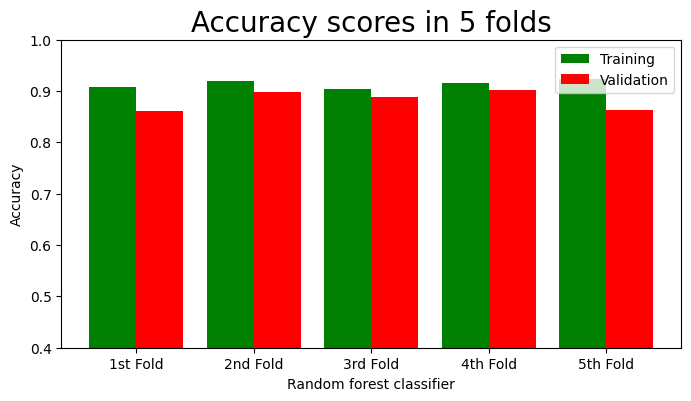

In [ ]:
import matplotlib.pyplot as plt

model_name= "Random forest classifier"
plot_results(model_name,"Accuracy","Accuracy scores in 5 folds",
           result["Training accuracy scores"],
           result["Validation accuracy scores"])

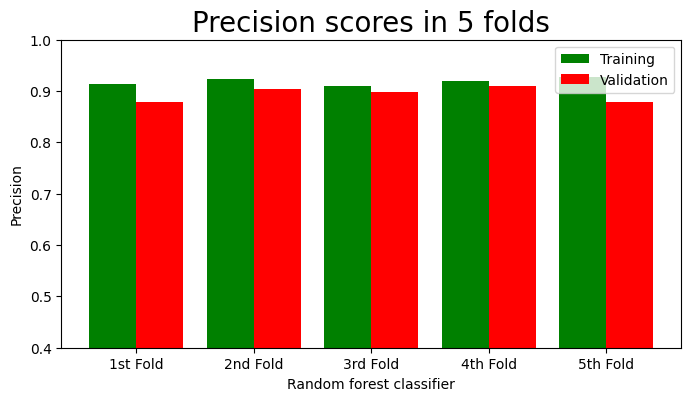

In [ ]:
model_name= "Random forest classifier"
plot_results(model_name,"Precision","Precision scores in 5 folds",
           result["Training precision scores"],
           result["Validation precision scores"])

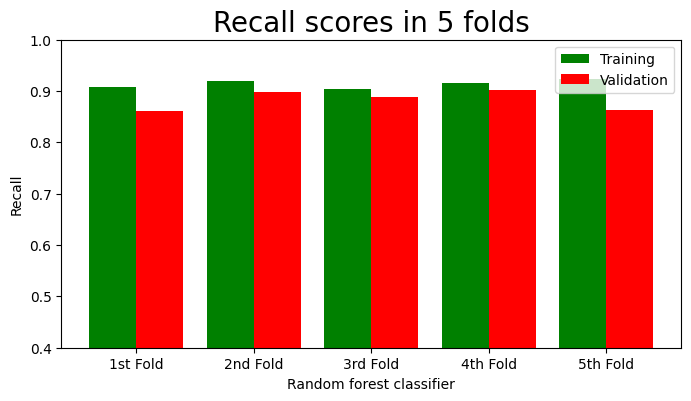

In [ ]:
model_name= "Random forest classifier"
plot_results(model_name,"Recall","Recall scores in 5 folds",
           result["Training recall scores"],
           result["Validation recall scores"])

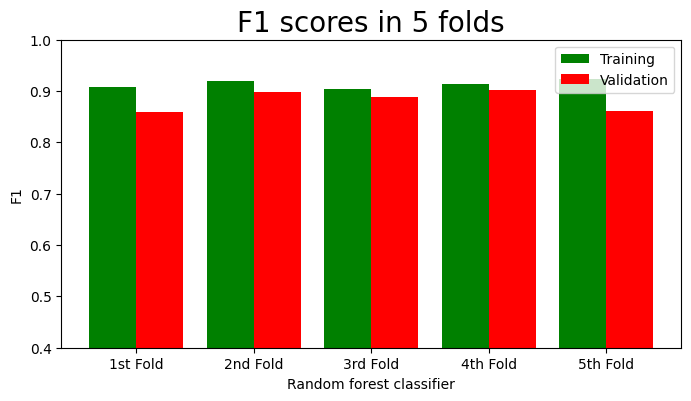

In [ ]:
model_name= "Random forest classifier"
plot_results(model_name,"F1","F1 scores in 5 folds",
           result["Training f1 score"],
           result["Validation f1 score"])